In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
from puzzle import *
import seaborn as sns
sns.set_theme()

In [67]:
# processing raw data, times greater to 60 reduced to 60, states over 1000000 reduced to 1000000
columns = ["File path", "Nodes visited", "Max heap size", "Time"]
for pattern in ["pattern","no_pattern"]:
    for method in ["dijkstra","a_star"]:
        for i in range(5,101,5):
            df = pd.read_csv(f"results/{pattern}/{method}/{i}.csv", header=None)
            df.columns = columns
            df['Nodes visited'] = df['Nodes visited'].apply(lambda x: min(x, 1000000))
            df['Max heap size'] = df['Max heap size'].apply(lambda x: min(x, 1000000))
            df["Time"] = df["Time"].apply(lambda x: min(x, 60))
            df.to_csv(f"results/{pattern}/{method}/{i}.csv",index=False)

In [100]:
# combining dataframes
dfs = {"pattern":{"dijkstra":{},"a_star":{}},"no_pattern":{"dijkstra":{},"a_star":{}}}
for pattern in ["pattern","no_pattern"]:
    for method in ["dijkstra","a_star"]:
        dfs[pattern][method]["Nodes visited"] = pd.DataFrame()
        dfs[pattern][method]["Max heap size"] = pd.DataFrame()
        dfs[pattern][method]["Time"] = pd.DataFrame()
        for i in range(5,101,5):
            df = pd.read_csv(f"results/{pattern}/{method}/{i}.csv")
            dfs[pattern][method]["Nodes visited"][i] = df["Nodes visited"]
            dfs[pattern][method]["Max heap size"][i] = df["Max heap size"]
            dfs[pattern][method]["Time"][i] = df["Time"]
        dfs[pattern][method]["Nodes visited"].to_csv(f"results/{pattern}_{method}_node.csv")
        dfs[pattern][method]["Max heap size"].to_csv(f"results/{pattern}_{method}_heap.csv")
        dfs[pattern][method]["Time"].to_csv(f"results/{pattern}_{method}_time.csv")

In [101]:
# binning data
time_bins = [0, 10, 20, 30, 40, 50, 59.99, float('inf')]
time_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
node_bins = [-1,100000,200000,300000,400000,500000,600000,700000,800000,900000,999999, float('inf')]
node_labels = ["0-100k","100k-200k","200k-300k","300k-400k","400k-500k","500k-600k","600k-700k","700k-800k","800k-900k","900k-1m","1m+"]
for pattern in ["pattern","no_pattern"]:
    for method in ["dijkstra","a_star"]:
        dfs[pattern][method]["Nodes visited"] = dfs[pattern][method]["Nodes visited"].apply(lambda x: pd.cut(x, bins=node_bins, labels=node_labels))
        dfs[pattern][method]["Max heap size"] = dfs[pattern][method]["Max heap size"].apply(lambda x: pd.cut(x, bins=node_bins, labels=node_labels))
        dfs[pattern][method]["Time"] = dfs[pattern][method]["Time"].apply(lambda x: pd.cut(x, bins=time_bins, labels=time_labels))

        dfs[pattern][method]["Nodes visited"] = dfs[pattern][method]["Nodes visited"].apply(lambda col: col.value_counts()).astype(float)
        dfs[pattern][method]["Max heap size"] = dfs[pattern][method]["Max heap size"].apply(lambda col: col.value_counts()).astype(float)
        dfs[pattern][method]["Time"] = dfs[pattern][method]["Time"].apply(lambda col: col.value_counts()).astype(float)

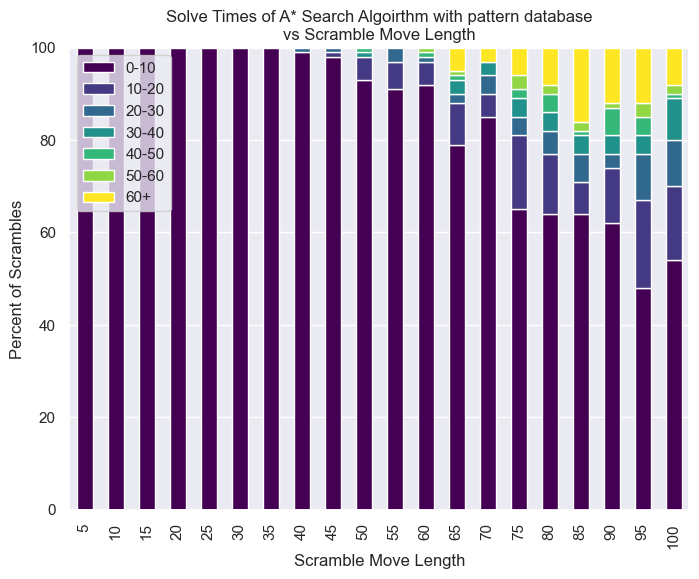

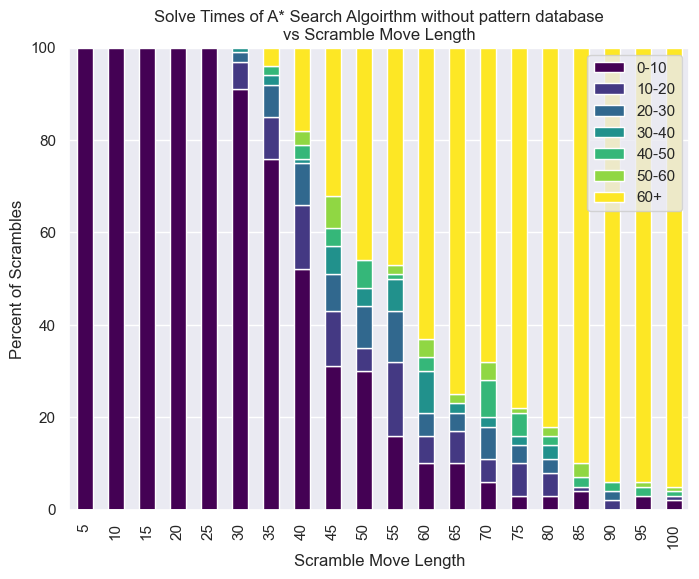

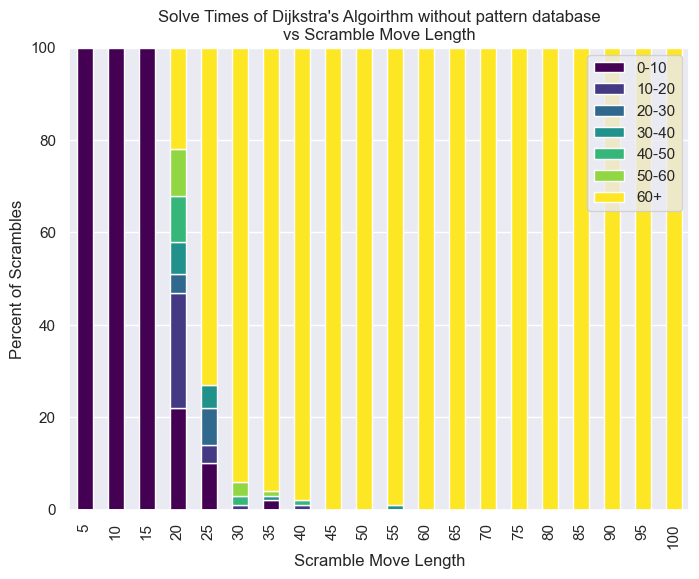

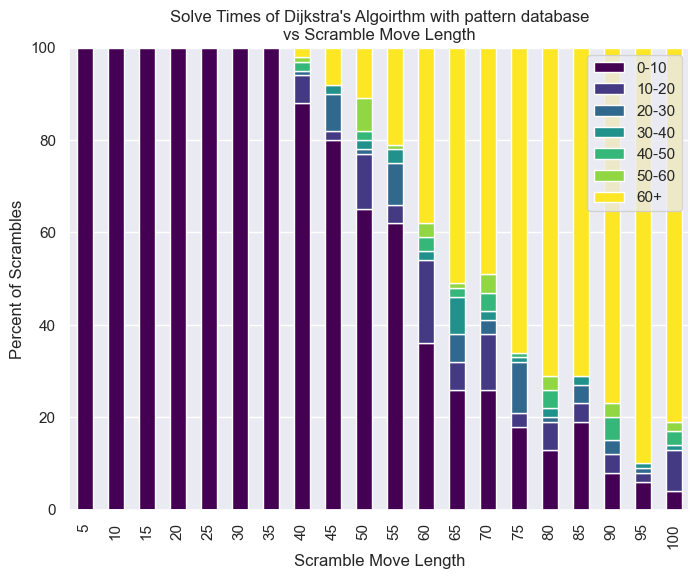

In [109]:
ax = dfs["pattern"]["a_star"]["Time"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Solve Times of A* Search Algoirthm with pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
plt.savefig(f"results/pattern_a_star_time.png", dpi=300)
ax = dfs["no_pattern"]["a_star"]["Time"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Solve Times of A* Search Algoirthm without pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
plt.savefig(f"results/no_pattern_a_star_time.png", dpi=300)
ax = dfs["no_pattern"]["dijkstra"]["Time"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Solve Times of Dijkstra's Algoirthm without pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
plt.savefig(f"results/no_pattern_dijkstra_time.png", dpi=300)
ax = dfs["pattern"]["dijkstra"]["Time"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Solve Times of Dijkstra's Algoirthm with pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
plt.savefig(f"results/pattern_dijkstra_time.png", dpi=300)

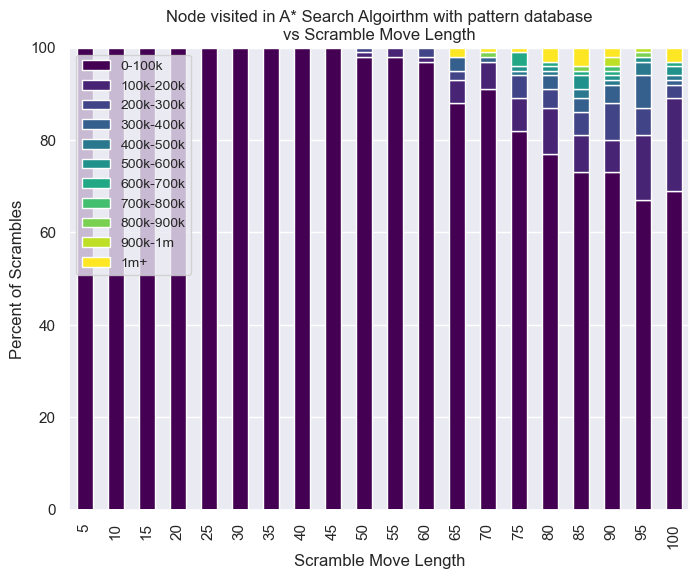

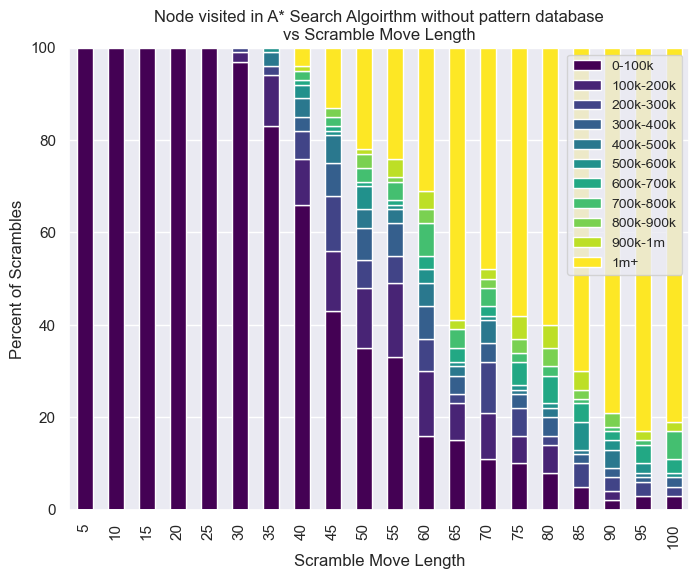

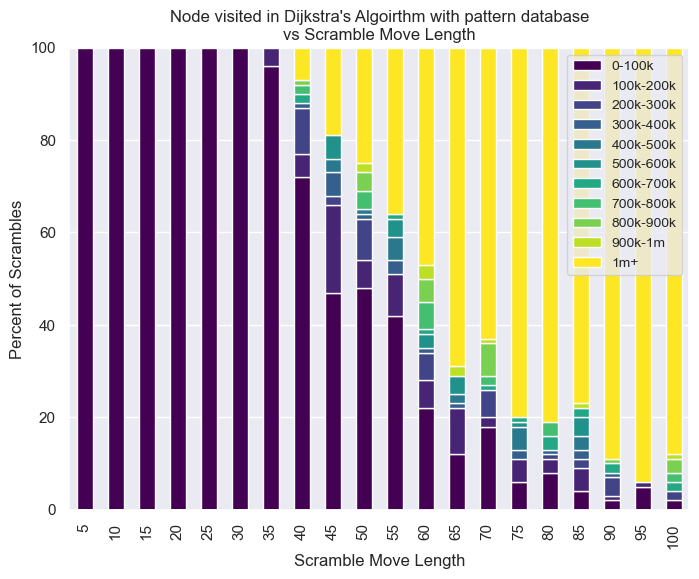

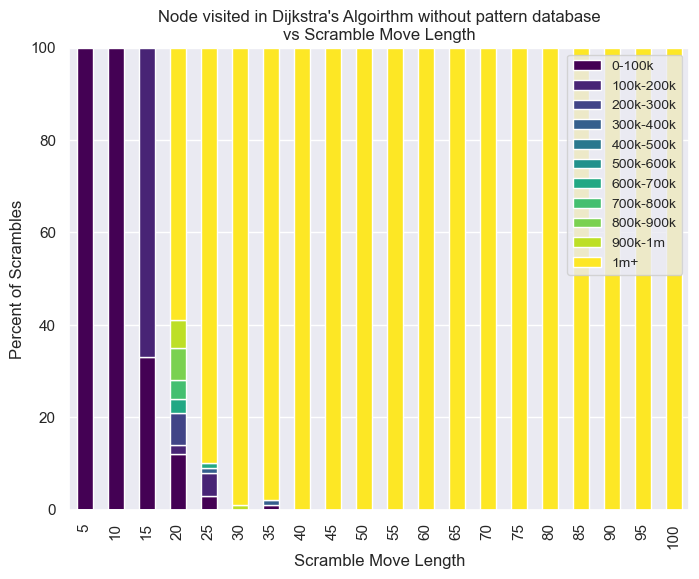

In [110]:
ax = dfs["pattern"]["a_star"]["Nodes visited"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Node visited in A* Search Algoirthm with pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
ax.legend(loc="upper left",fontsize=10)
plt.savefig(f"results/pattern_a_star_node.png", dpi=300)
ax = dfs["no_pattern"]["a_star"]["Nodes visited"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Node visited in A* Search Algoirthm without pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
ax.legend(loc="upper right",fontsize=10)
plt.savefig(f"results/no_pattern_a_star_node.png", dpi=300)
ax = dfs["pattern"]["dijkstra"]["Nodes visited"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Node visited in Dijkstra's Algoirthm with pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
ax.legend(loc="upper right",fontsize=10)
plt.savefig(f"results/pattern_dijkstra_node.png", dpi=300)
ax = dfs["no_pattern"]["dijkstra"]["Nodes visited"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Node visited in Dijkstra's Algoirthm without pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
ax.legend(loc="upper right",fontsize=10)
plt.savefig(f"results/no_pattern_dijkstra_node.png", dpi=300)

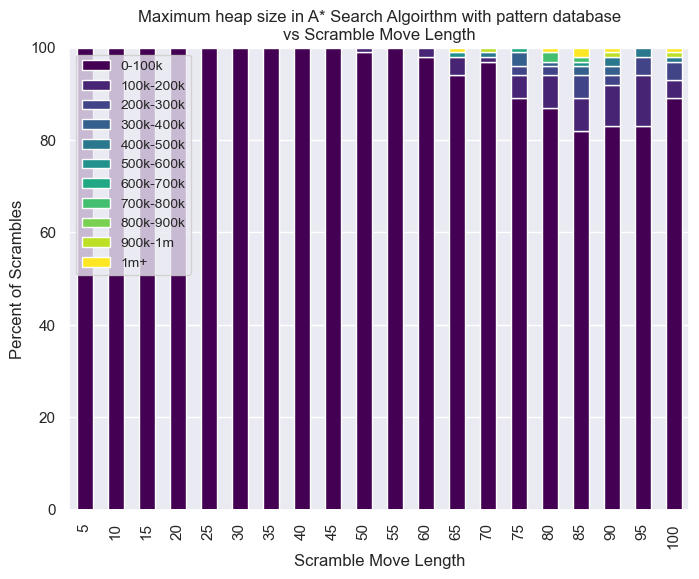

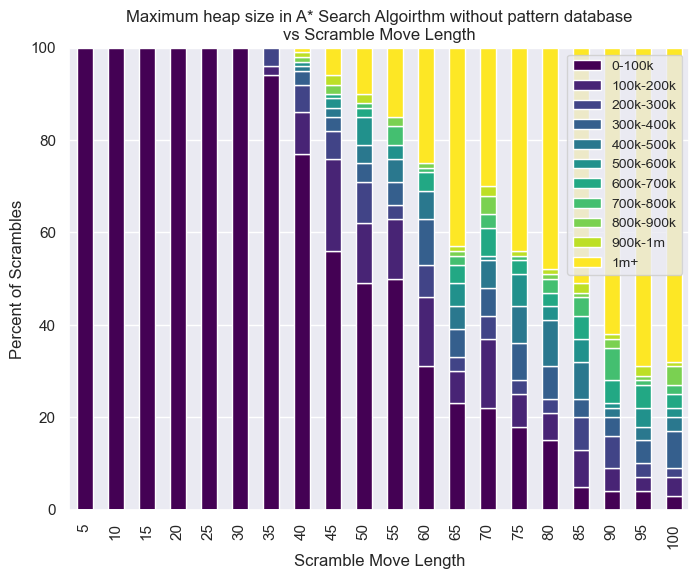

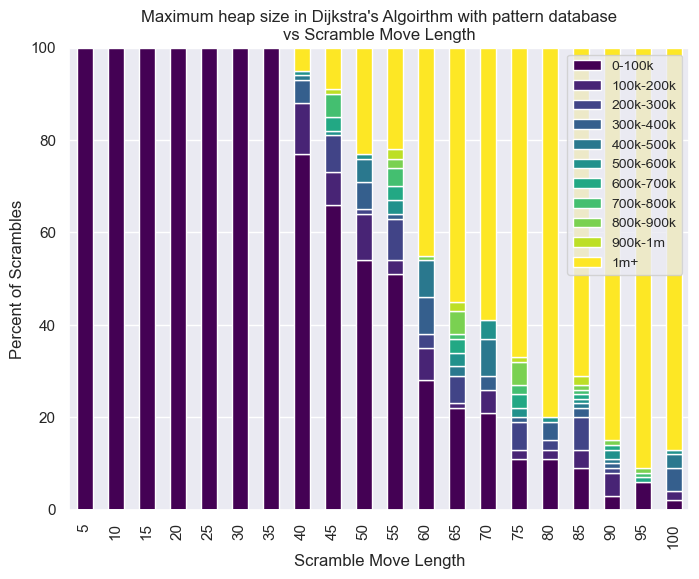

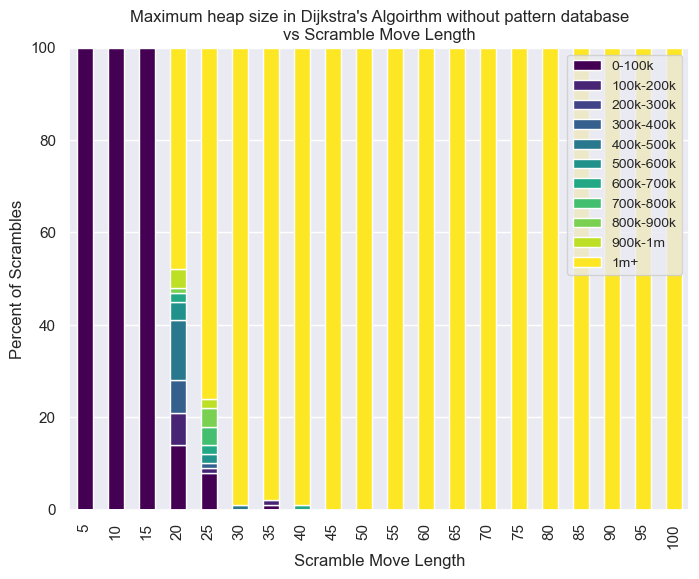

In [111]:
ax = dfs["pattern"]["a_star"]["Max heap size"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Maximum heap size in A* Search Algoirthm with pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
ax.legend(loc="upper left",fontsize=10)
plt.savefig(f"results/pattern_a_star_heap.png", dpi=300)
ax = dfs["no_pattern"]["a_star"]["Max heap size"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Maximum heap size in A* Search Algoirthm without pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
ax.legend(loc="upper right",fontsize=10)
plt.savefig(f"results/no_pattern_a_star_heap.png", dpi=300)
ax = dfs["pattern"]["dijkstra"]["Max heap size"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Maximum heap size in Dijkstra's Algoirthm with pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
ax.legend(loc="upper right",fontsize=10)
plt.savefig(f"results/pattern_dijkstra_heap.png", dpi=300)
ax = dfs["no_pattern"]["dijkstra"]["Max heap size"].T.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
ax.set_title("Maximum heap size in Dijkstra's Algoirthm without pattern database\nvs Scramble Move Length")
ax.set_xlabel("Scramble Move Length")
ax.set_ylabel("Percent of Scrambles")
ax.set_ylim(0,100)
ax.legend(loc="upper right",fontsize=10)
plt.savefig(f"results/no_pattern_dijkstra_heap.png", dpi=300)